In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_theme()

resultDatasetPath = "../dataset/tweets_clean_with_outliers.h5"

In [2]:
%%time
datasetTweetsCleanedPath = "../dataset/tweets_clean_datatype.h5"
df_tweets = pd.read_hdf(datasetTweetsCleanedPath)

CPU times: user 5.82 s, sys: 5.33 s, total: 11.1 s
Wall time: 11.5 s


In [3]:
tweets_isna = df_tweets.isna()
tweets_isna.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [4]:
count_of_missing_val = tweets_isna.sum(axis = 1)

In [5]:
count_of_missing_val.max()

9

In [6]:
df_tweets.user_id.isna().sum()

433645

In [7]:
df_tweets[count_of_missing_val >= 5]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
42,NaN,1.0,NaN,NaN,NaN,0.0,NaN,2019-10-30 06:11:12,NaN
84,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2018-06-02 03:24:58,"@danloving it’a a rarity, for sure. but for cr..."
127,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2019-07-30 18:58:59,@perfectdkids i'm not a bad kid
129,7.254514e+08,NaN,0.0,NaN,NaN,NaN,NaN,2020-03-01 03:45:28,"@todayisaray sorry, i was in the gym."
161,2.211927e+09,0.0,NaN,NaN,NaN,NaN,NaN,2020-01-29 00:24:20,NaN
...,...,...,...,...,...,...,...,...,...
11712036,7.659171e+08,NaN,NaN,0.0,NaN,0.0,NaN,2020-04-04 05:47:00,NaN
11712043,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2020-03-31 04:36:19,history in the making.
11712059,9.643556e+07,0.0,NaN,0.0,NaN,NaN,NaN,2019-10-22 12:10:26,NaN
11712084,2.432829e+08,NaN,NaN,NaN,NaN,0.0,NaN,2019-09-07 02:31:17,nobody remembers the guy who finished second b...


In [8]:
%%time
number_of_good_entries = len(df_tweets[count_of_missing_val <= 4])
rows, cols = df_tweets.shape
print("Dropping", (rows - number_of_good_entries), "not good entries")
df_tweets = df_tweets[count_of_missing_val <= 4]

Dropping 656680 not good entries
CPU times: user 1.74 s, sys: 343 ms, total: 2.08 s
Wall time: 1.99 s


In [9]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,3.277463e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang..."
1,3.337229e+08,1.0,0.0,0.0,0.0,0.0,1.0,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit..."
2,2.379756e+09,0.0,0.0,0.0,0.0,0.0,1.0,2019-05-02 13:34:31,@lolatcomedy awsome
3,4.662269e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...
4,1.355538e+09,114.0,0.0,0.0,1.0,0.0,1.0,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!
...,...,...,...,...,...,...,...,...,...
11712085,8.657052e+06,0.0,0.0,1.0,0.0,0.0,1.0,2019-04-26 02:53:34,@_victoriamm twoot.
11712086,2.209330e+08,0.0,0.0,0.0,0.0,0.0,0.0,2018-05-04 05:29:33,esta manana aun esta muy frio ! miren esto ! ...
11712087,5.874910e+08,0.0,0.0,0.0,0.0,0.0,1.0,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ..."
11712089,1.278956e+08,0.0,0.0,1.0,1.0,0.0,0.0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave


In [10]:
def hist(df, column):
    numberOfBins = int(np.log2(len(df[column][df[column].notna()])) + 1)
    print("Number of bins:", numberOfBins)
    df[column].plot(kind='hist', title=column, bins=numberOfBins)
    plt.ylabel("count")
    plt.show()

def boxplot(df, column):
    df.boxplot(column=column)
    plt.show()

def log_scale(df, column):
    return pd.DataFrame(np.log10(1+df[column][df[column].notna()]))

def analyze_column(df, column):
    hist(df, column)
    
    print("\n\nLog scale")
    column_log_scale = log_scale(df, column)
    hist(column_log_scale, column)

    median = df[column].median()
    print("\n\nMedian:", median)

    return median

def fillna_grouby_userid(df, attr, global_median):
    print("Missing value before: ", df[attr].isna().sum())
    df[attr].fillna(df.groupby(["user_id"])[attr].transform(lambda x: np.floor(np.nanmedian(x))), inplace=True)
    df[attr].fillna(global_median, inplace=True)
    print("Missing value after: ", df[attr].isna().sum())

In [11]:
df_tweets.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.082618e+07,1.073683e+07,1.067923e+07,1.064842e+07,1.053345e+07,1.067953e+07,1.062243e+07
mean,2.771059e+289,5.741883e+02,2.668466e-01,2.429710e+00,1.761211e-01,1.644572e-01,5.257702e-01
std,inf,1.401326e+04,1.290290e+02,6.160311e+02,6.200865e-01,3.789912e-01,8.145838e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.325471e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.680803e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.228015e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,3.000000e+296,3.350111e+06,2.000000e+05,9.224620e+05,3.800000e+01,4.000000e+01,4.000000e+01


## User id

In [12]:
df_tweets.user_id.isna().sum()

213715

In [13]:
df_tweets[df_tweets.user_id == -1]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text


In [14]:
df_tweets.user_id.fillna(-1, inplace=True)

In [15]:
df_tweets.user_id.isna().sum()

0

## Retweet_count

Number of bins: 24


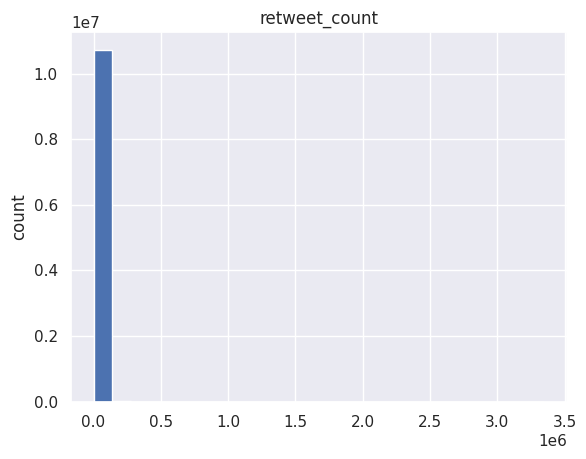



Log scale
Number of bins: 24


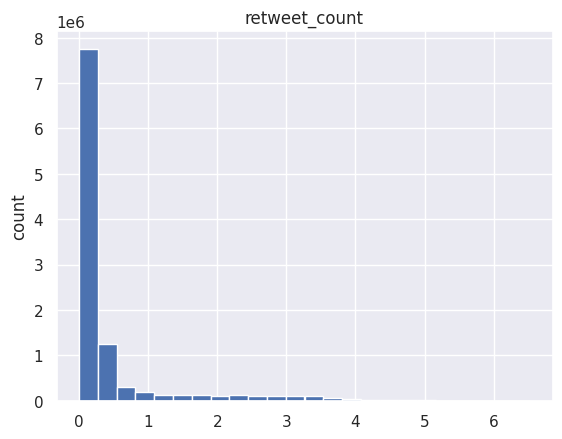



Median: 0.0


In [16]:
median = analyze_column(df_tweets, "retweet_count")

In [17]:
median_by_user = df_tweets.groupby(["user_id"])["retweet_count"].apply(lambda x: np.floor(np.nanmedian(x))) # Compute the median while ignoring NaNs
median_by_user.value_counts()
median_by_user.min()
median_by_user.max()

/home/dferraro/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


58211.0

In [18]:
fillna_grouby_userid(df_tweets, "retweet_count", median)

Missing value before:  303066


/home/dferraro/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Missing value after:  0


## Reply_count

Number of bins: 24


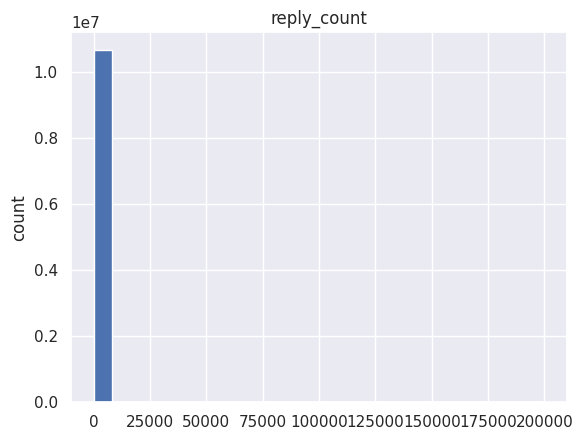



Log scale
Number of bins: 24


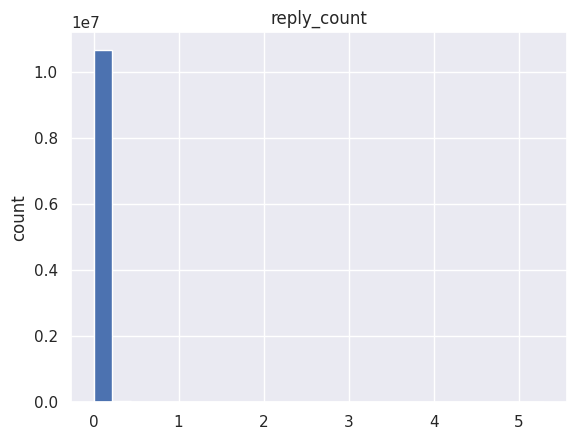



Median: 0.0


In [19]:
median = analyze_column(df_tweets, "reply_count")

In [20]:
df_tweets.reply_count.value_counts()

0.0       10660755
1.0          14205
2.0           1319
3.0            460
4.0            233
            ...   
508.0            1
2755.0           1
218.0            1
758.0            1
178.0            1
Name: reply_count, Length: 623, dtype: int64

In [21]:
fillna_grouby_userid(df_tweets, "reply_count", median)

Missing value before:  360674


/home/dferraro/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Missing value after:  0


## Favorite_count

Number of bins: 24


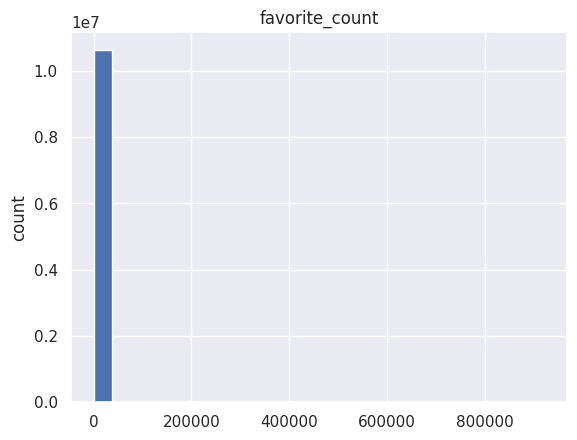



Log scale
Number of bins: 24


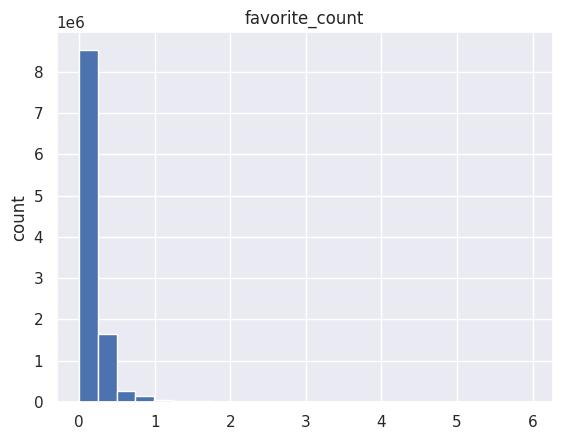



Median: 0.0


In [22]:
median = analyze_column(df_tweets, "favorite_count")

In [23]:
fillna_grouby_userid(df_tweets, "favorite_count", median)

Missing value before:  391476


/home/dferraro/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Missing value after:  0


## num_hashtags

Number of bins: 24


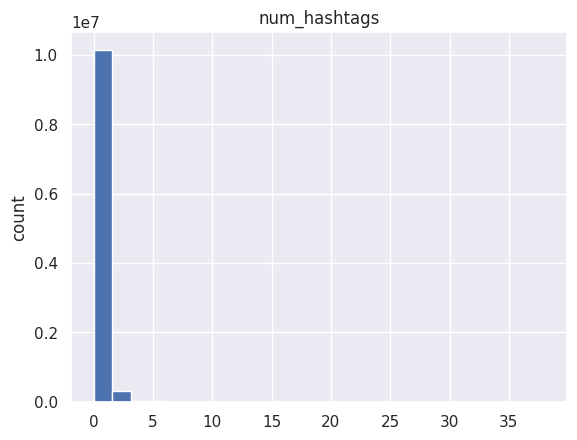



Log scale
Number of bins: 24


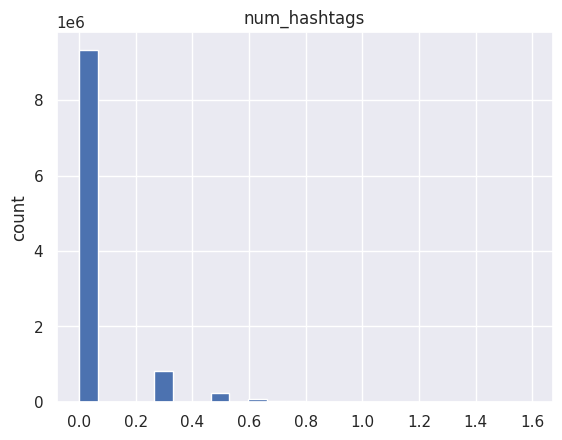



Median: 0.0


In [24]:
median = analyze_column(df_tweets, "num_hashtags")

In [25]:
median_by_user = df_tweets.groupby(["user_id"])["num_hashtags"].apply(lambda x: np.floor(np.nanmedian(x))) # Compute the median while ignoring NaNs
median_by_user.value_counts()

/home/dferraro/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


0.0    11589
1.0      229
2.0       32
3.0        8
7.0        1
4.0        1
6.0        1
Name: num_hashtags, dtype: int64

In [26]:
fillna_grouby_userid(df_tweets, "num_hashtags", median)

Missing value before:  506451


/home/dferraro/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Missing value after:  0


## num_urls

Number of bins: 24


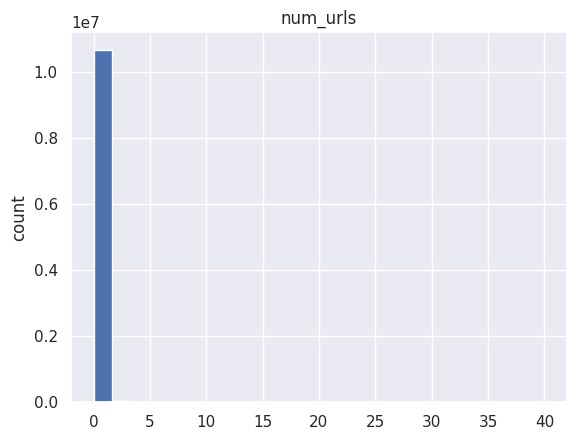



Log scale
Number of bins: 24


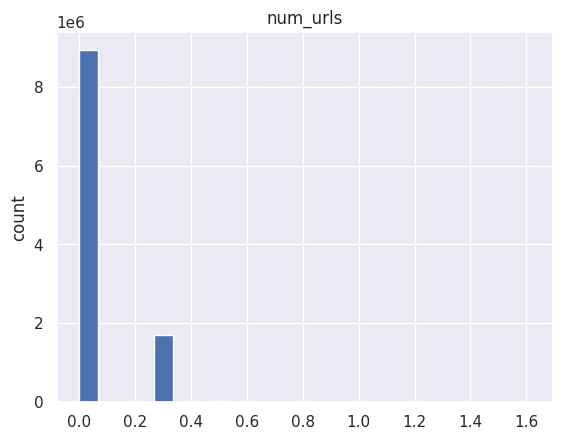



Median: 0.0


In [27]:
median = analyze_column(df_tweets, "num_urls")

In [28]:
fillna_grouby_userid(df_tweets, "num_urls", median)

Missing value before:  360373


/home/dferraro/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Missing value after:  0


## num_mentions

Number of bins: 24


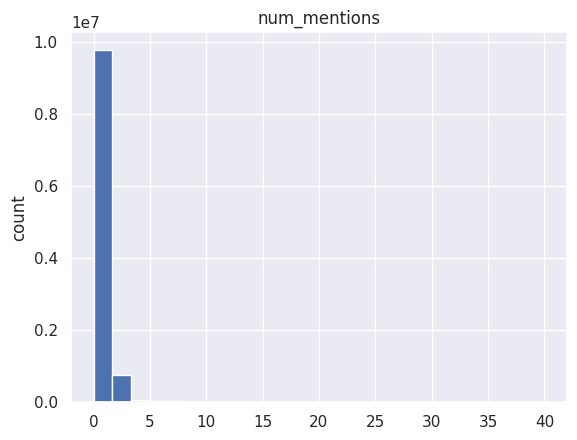



Log scale
Number of bins: 24


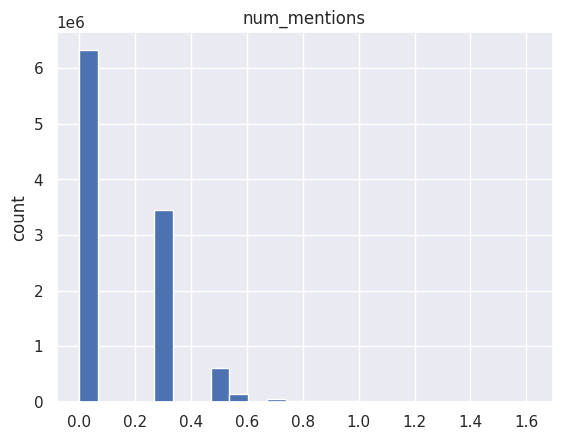



Median: 0.0


In [29]:
median = analyze_column(df_tweets, "num_mentions")

In [30]:
fillna_grouby_userid(df_tweets, "num_mentions", median)

Missing value before:  417474


/home/dferraro/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Missing value after:  0


## text

In [31]:
df_tweets.text.fillna("", inplace=True)

## created_at

In [32]:
df_tweets.created_at.isna().sum()

96700

In [33]:
df_tweets.fillna("1900-12-12 12:12:12", inplace=True)
df_tweets.created_at.min()

Timestamp('1900-12-12 12:12:12')

## Change data type

In [34]:
df_tweets.text = df_tweets.text.astype(str)

In [35]:
def to_int64(df, column):
    print("Before conversion")
    print("Max:", df[column].max(), "   Min:", df[column].min())
    df[column] = df[column].astype(np.int64)
    print("After conversion")
    print("Max:", df[column].max(), "   Min:", df[column].min())

In [36]:
to_int64(df_tweets, "retweet_count")

Before conversion
Max: 3350111.0    Min: 0.0
After conversion
Max: 3350111    Min: 0


In [37]:
to_int64(df_tweets, "reply_count")

Before conversion
Max: 200000.0    Min: 0.0
After conversion
Max: 200000    Min: 0


In [38]:
to_int64(df_tweets, "favorite_count")

Before conversion
Max: 922462.0    Min: 0.0
After conversion
Max: 922462    Min: 0


In [39]:
to_int64(df_tweets, "num_hashtags")

Before conversion
Max: 38.0    Min: 0.0
After conversion
Max: 38    Min: 0


In [40]:
to_int64(df_tweets, "num_urls")

Before conversion
Max: 40.0    Min: 0.0
After conversion
Max: 40    Min: 0


In [41]:
to_int64(df_tweets, "num_mentions")

Before conversion
Max: 40.0    Min: 0.0
After conversion
Max: 40    Min: 0


In [42]:
df_tweets.dtypes

user_id                  float64
retweet_count              int64
reply_count                int64
favorite_count             int64
num_hashtags               int64
num_urls                   int64
num_mentions               int64
created_at        datetime64[ns]
text                      object
dtype: object

In [43]:
df_tweets.isna().sum()

user_id           0
retweet_count     0
reply_count       0
favorite_count    0
num_hashtags      0
num_urls          0
num_mentions      0
created_at        0
text              0
dtype: int64

In [44]:
df_tweets.duplicated().sum()

576740

In [45]:
df_tweets = df_tweets.drop_duplicates(keep='first')

# Save to file

In [46]:
df_tweets.to_hdf(resultDatasetPath, 'df_tweets', mode='w')